In [1]:
import numpy as np
from numpy.linalg import det
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

In [2]:
a = np.array([[0,1],[1,0]])
b = np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    tB = np.array([[params[4],params[5]],
                   [params[6],params[7]]])
    return tA, tB
          
def fit_fucntion(params , k_p=100):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBa= np.dot(tB,b)
        
        zero_mat= tAa - tBa
        
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        A_max=np.sqrt((bond+bond)**2* np.max([np.linalg.det(a),np.linalg.det(b)])**2)
        A_min =np.sqrt(np.min([np.linalg.det(a),np.linalg.det(b)])**2)
        
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBa= det(tBa)*det(tBa)
        
        A_incentive = A_max/detTAa  + detTAa/A_min #(1-inf)
        B_incentive = A_max/detTBa  + detTBa/A_min
        f = (s/A_min)**k_p #+ A_incentive + B_incentive 
        
        print("s:{}|A_incentive:{}|B_incentive:{}".format(s,A_incentive,B_incentive))
        
        
        return f 

In [3]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(8)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': 0
    
}

[[-bond,bond] for _ in range(8)],

#
input_size = 8 # since our function has one variable this is a trivial scenario.
start_point = [1,0,0,1,1,0,0,1 ]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

s:32|A_incentive:20.04|B_incentive:25.031999999999993


In [4]:
epochs= 50
history_book = experiment.evolve( epochs, prints_p=5)

s:3342|A_incentive:1.8000000000000003|B_incentive:57600.00001388889
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:4|epoch:0|change:4.0424409860228974e+212|value:52601359015.48476
s:3897|A_incentive:17.685351473922907|B_incentive:90000.00000888873
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4618|A_incentive:108.1673964497041|B_incentive:84100.0000095125
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4150|A_incentive:1.8900000000000001|B_incentive:36100.00002216068
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3956|A_incentive:29.18743484224966|B_incentive:102400.00000781231
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1479|A_incentive:2.872499999999999|B_incentive:202

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2648|A_incentive:1.9955555555555557|B_incentive:inf
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:835|A_incentive:4.199999999999999|B_incentive:225.0035555555554
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0975609756097561|epoch:25|change:2.369445266947522e+152|value:52601359015.48476
s:4906|A_incentive:1.9955555555555557|B_incentive:40000.000019999985
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3750|A_incentive:1.8000000000000003|B_incentive:14400.000055555558
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4758|A_incentive:282.24283446712013|B_incentive:6400.000124999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_71731/246225477.py:34: RuntimeWarning: divide by zero encountered in double_scalars
  B_incentive = A_max/detTBa  + detTBa/A_min
/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_71731/246225477.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  A_incentive = A_max/detTAa  + detTAa/A_min #(1-inf)


s:7495|A_incentive:6.878343195266273|B_incentive:390625.0000020478
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2282|A_incentive:174.2445913682276|B_incentive:32400.00002469131
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1539|A_incentive:31.385510204081662|B_incentive:18225.00004389576
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.03305785123966942|epoch:20|change:8.508658942803284e+178|value:52601359015.48476
s:3878|A_incentive:174.2445913682276|B_incentive:8100.000098765436
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2262|A_incentive:1.890000000000001|B_incentive:36100.00002216068
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1330|A_incentive:inf|B_incentive:2

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1046|A_incentive:16.049999999999997|B_incentive:1600.0005000000021
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2338|A_incentive:1.9955555555555557|B_incentive:52900.00001512292
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2627|A_incentive:17.685351473922907|B_incentive:12100.000066115714
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.016597510373443983|epoch:15|change:1.4190784711083801e+202|value:52601359015.48476
s:3877|A_incentive:27.06958579881655|B_incentive:7225.000110726636
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2783|A_incentive:1.9955555555555557|B_incentive:900.0008888888888
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_ince

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3334|A_incentive:5.00528925619835|B_incentive:52900.00001512292
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:657|A_incentive:57.773850415512456|B_incentive:3600.000222222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4266|A_incentive:2.872499999999999|B_incentive:67600.00001183433
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.014234875444839857|epoch:20|change:1.6146717393350054e+223|value:52601359015.48476
s:3550|A_incentive:64.01250000000002|B_incentive:5625.000142222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3637|A_incentive:21.197807183364844|B_incentive:22500.000035555557
s:32|A_incentive:20.04|B_incentive

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.00997506234413965|epoch:5|change:5.620141375202611e+208|value:52601359015.48476
s:3214|A_incentive:11.629204152249137|B_incentive:8100.000098765436
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1701|A_incentive:2.3681632653061224|B_incentive:4225.000189349112
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3453|A_incentive:92.16868055555551|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4297|A_incentive:17.685351473922907|B_incentive:5625.000142222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3484|A_incentive:64.01249999999995|B_incentive:inf
s:32|A_incentive:20.04|B_incentive:25.0319999999

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.009070294784580499|epoch:30|change:5.39168828862772e+193|value:52601359015.48476
s:6230|A_incentive:16.049999999999997|B_incentive:50625.0000158025
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1514|A_incentive:1.8000000000000003|B_incentive:32400.00002469131
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1588|A_incentive:1.9955555555555557|B_incentive:4225.000189349112
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4211|A_incentive:7.942040816326537|B_incentive:15625.000051200019
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1969|A_incentive:43.578365472910974|B_incentive:400.0019999999997
s:32|A_incentive:20.04|B_incentiv

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1346|A_incentive:10.318124999999998|B_incentive:225.0035555555554
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2639|A_incentive:46.25730103806231|B_incentive:100.00799999999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.006655574043261232|epoch:0|change:2.238402358795914e+202|value:52601359015.48476
s:1127|A_incentive:108.1673964497042|B_incentive:25.032000000000018
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2714|A_incentive:51.85543209876544|B_incentive:72900.00001097399
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3527|A_incentive:14.49540166204986|B_incentive:9025.000088642662
s:32|A_incentive:20.04|B_incentive

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:731|A_incentive:36.022222222222204|B_incentive:2025.0003950617286
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3950|A_incentive:100.00799999999997|B_incentive:10000.000079999994
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0062402496099844005|epoch:5|change:7.340213555813758e+219|value:52601359015.48476
s:6963|A_incentive:51.85543209876544|B_incentive:348100.00000229804
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:678|A_incentive:11.629204152249137|B_incentive:6400.000124999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2866|A_incentive:13.021728395061725|B_incentive:48400.00001652899
s:32|A_incentive:20.04|B_incent

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1012|A_incentive:5.89888888888889|B_incentive:5625.000142222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.005547850208044384|epoch:45|change:5.2972489453107783e+160|value:52601359015.48476
s:2665|A_incentive:1.9955555555555557|B_incentive:32400.000024691373
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2497|A_incentive:20.04|B_incentive:32400.00002469131
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:6921|A_incentive:57.773850415512456|B_incentive:70225.00001139184
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1564|A_incentive:14.49540166204986|B_incentive:4225.000189349112
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.0319999

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4104|A_incentive:19.401322314049597|B_incentive:152100.00000525953
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3617|A_incentive:36.02222222222227|B_incentive:65025.00001230295
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2946|A_incentive:40.97953125000001|B_incentive:81225.00000984913
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2650|A_incentive:100.00800000000007|B_incentive:32400.000024691373
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.004756242568370987|epoch:15|change:3.3930208351449004e+202|value:52601359015.48476
s:1515|A_incentive:51.85543209876544|B_incentive:3025.0002644628125
s:32|A_incentive:20.04|B_incen

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.003996003996003996|epoch:10|change:2.743435204710607e+204|value:52601359015.48476
s:1789|A_incentive:40.97953124999997|B_incentive:1600.0005000000021
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:779|A_incentive:33.66378121284187|B_incentive:8100.00009876542
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1490|A_incentive:4.199999999999999|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2498|A_incentive:13.021728395061734|B_incentive:400.0020000000004
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3524|A_incentive:5.89888888888889|B_incentive:136900.0000058436
s:32|A_incentive:20.04|B_incentive:2

s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0037002775208140612|epoch:5|change:2.2180020557278608e+212|value:52601359015.48476
s:3221|A_incentive:36.022222222222204|B_incentive:5625.000142222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1358|A_incentive:2.872499999999999|B_incentive:10000.000079999994
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1718|A_incentive:43.57836547291094|B_incentive:400.0020000000004
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1430|A_incentive:1.8900000000000006|B_incentive:18225.00004389576
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1454|A_incentive:70.57133786848068|B_incentive:10000.000079999994
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incent

s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0035682426404995546|epoch:25|change:8.659492942935257e+221|value:52601359015.48476
s:1050|A_incentive:1.8000000000000003|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2681|A_incentive:2.3681632653061233|B_incentive:12100.000066115714
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3243|A_incentive:inf|B_incentive:19600.000040816318
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2327|A_incentive:5.00528925619835|B_incentive:13225.0000604915
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3012|A_incentive:92.16868055555551|B_incentive:36100.00002216068
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.03199999

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:242|A_incentive:9.0888888888889|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:948|A_incentive:13.021728395061725|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2157|A_incentive:174.2445913682276|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2339|A_incentive:2.3681632653061224|B_incentive:40000.000019999985
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0033305578684429643|epoch:20|change:1.2853497390350883e+197|value:52601359015.48476
s:5231|A_incentive:1.8000000000000003|B_incentive:16900.000047337275
s:32|A_incentive:20.04|B_incen

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2135|A_incentive:16.049999999999997|B_incentive:15625.000051200019
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0032232070910556006|epoch:40|change:1.3989012843325818e+193|value:52601359015.48476
s:4444|A_incentive:5.89888888888889|B_incentive:84100.00000951265
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1378|A_incentive:23.07472222222221|B_incentive:8100.000098765436
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1505|A_incentive:81.00987654320986|B_incentive:14400.000055555558
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3950|A_incentive:1.8|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.0319999

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1242|A_incentive:38.46081165452654|B_incentive:inf
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1381|A_incentive:13.021728395061725|B_incentive:3025.0002644628125
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2185|A_incentive:77.45033057851246|B_incentive:28900.000027681643
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3409|A_incentive:40.97953124999997|B_incentive:7225.000110726651
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0029390154298310073|epoch:30|change:2.942383358923095e+213|value:52601359015.48476
s:2074|A_incentive:16.050000000000015|B_incentive:15625.000051200019
s:32|A_incentive:20.04|B_incentive:25.031999

s:910|A_incentive:31.385510204081662|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5459|A_incentive:4.200000000000003|B_incentive:202500.00000395073
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1749|A_incentive:353.442263467633|B_incentive:2025.0003950617286
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3866|A_incentive:100.00799999999997|B_incentive:7225.000110726636
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0027758501040943797|epoch:20|change:8.554292615967324e+218|value:52601359015.48476
s:4587|A_incentive:27.069585798816583|B_incentive:48400.000016528895
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2075|A_incentive:13.02172839

s:2310|A_incentive:2.3681632653061224|B_incentive:10000.000079999994
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2767|A_incentive:5.00528925619835|B_incentive:32400.00002469131
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.002562459961563101|epoch:25|change:2.5522020130982513e+204|value:52601359015.48476
s:2570|A_incentive:23.07472222222221|B_incentive:3600.000222222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:6063|A_incentive:116.64685871056247|B_incentive:144400.00000554026
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1235|A_incentive:36.022222222222204|B_incentive:1600.0005000000021
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1847|A_incentive:67.25189767

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2997|A_incentive:1.9955555555555557|B_incentive:65025.00001230295
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1209|A_incentive:33.66378121284187|B_incentive:3600.000222222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:645|A_incentive:67.25189767995245|B_incentive:8100.000098765436
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0024375380865326026|epoch:35|change:1.4520133064708697e+141|value:52601359015.48476
s:1381|A_incentive:19.401322314049583|B_incentive:14400.000055555558
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2370|A_incentive:1.8900000000000006|B_incentive:22500.000035555557
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incen

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:7548|A_incentive:5.89888888888889|B_incentive:518400.0000015446
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0023242300987797795|epoch:45|change:9.754124219998782e+247|value:52601359015.48476
s:3622|A_incentive:16.049999999999997|B_incentive:108900.00000734617
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2255|A_incentive:inf|B_incentive:42025.000019036255
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2585|A_incentive:108.1673964497041|B_incentive:96100.00000832455
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:681|A_incentive:1.8000000000000003|B_incentive:900.0008888888888
s:32|A_incentive:20.04|B_incentive:25.031999999

s:2417|A_incentive:2.872499999999999|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.002172732210755025|epoch:40|change:3.417151026447948e+198|value:52601359015.48476
s:1106|A_incentive:5.159999999999998|B_incentive:225.0035555555554
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5754|A_incentive:163.84488281249992|B_incentive:160000.000005
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:747|A_incentive:29.18743484224966|B_incentive:6400.000124999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5602|A_incentive:5.160000000000004|B_incentive:42025.000019036255
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3411|A_incentive:16.049999999999997|

s:756|A_incentive:125.44637755102029|B_incentive:1225.0006530612236
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0020397756246812856|epoch:20|change:1.1433486489630031e+148|value:52601359015.48476
s:405|A_incentive:449.44177999288064|B_incentive:14400.000055555558
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1929|A_incentive:27.069585798816583|B_incentive:38025.000021038744
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1988|A_incentive:16.049999999999997|B_incentive:7225.000110726636
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1923|A_incentive:1.9955555555555557|B_incentive:40000.000019999985
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:465|A_incentive:92.168680

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1362|A_incentive:14.49540166204986|B_incentive:1600.0005000000021
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0019598236158745717|epoch:30|change:4.204456760576708e+173|value:52601359015.48476
s:2436|A_incentive:1.9955555555555557|B_incentive:21025.000038049944
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1954|A_incentive:179.56445533526386|B_incentive:400.0020000000004
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4610|A_incentive:4.200000000000003|B_incentive:144400.00000554026
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1270|A_incentive:81.00987654320986|B_incentive:3025.0002644628125
s:32|A_incentive:20.04|B_ince

s:1233|A_incentive:566.4414123296372|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0018859028760018863|epoch:5|change:2.0058885178041878e+169|value:52601359015.48476
s:1710|A_incentive:16.049999999999997|B_incentive:60025.00001332774
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1496|A_incentive:49.01632653061223|B_incentive:7225.000110726636
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2741|A_incentive:10.318124999999998|B_incentive:27225.00002938475
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3231|A_incentive:19.401322314049597|B_incentive:78400.00001020406
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2429|A_incentive:31.385510204

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2444|A_incentive:40.97953124999997|B_incentive:16900.000047337275
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0018173557473875517|epoch:15|change:1.0378134381045892e+199|value:52601359015.48476
s:3938|A_incentive:inf|B_incentive:4900.000163265311
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2059|A_incentive:2.872499999999999|B_incentive:19600.000040816318
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1966|A_incentive:5.89888888888889|B_incentive:625.0012799999995
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2452|A_incentive:96.04832986255732|B_incentive:11025.000072562354
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.03199999

s:3741|A_incentive:84.64945179584123|B_incentive:55225.00001448612
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2130|A_incentive:10.318124999999998|B_incentive:14400.000055555558
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1210|A_incentive:49.01632653061223|B_incentive:25.032000000000018
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2394|A_incentive:10.31812500000001|B_incentive:38025.0000210388
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1209|A_incentive:5.89888888888889|B_incentive:4225.000189349112
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0017849174475680506|epoch:25|change:2.80950118024146e+168|value:52601359015.48476
s:2162|A_incentive:inf|B_incentive:

s:510|A_incentive:5.16|B_incentive:400.0019999999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2113|A_incentive:77.45033057851246|B_incentive:400.0019999999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3383|A_incentive:23.07472222222221|B_incentive:72900.00001097399
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:970|A_incentive:7.942040816326529|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1437|A_incentive:20.04000000000001|B_incentive:24025.00003329862
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0017233950883239987|epoch:35|change:8.946969281055961e+175|value:52601359015.48476
s:738|A_incentive:5.159999999999998|B_incentive:1

s:2184|A_incentive:5.16|B_incentive:400.0019999999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2367|A_incentive:38.46081165452654|B_incentive:105625.00000757398
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3406|A_incentive:5.16|B_incentive:38025.0000210388
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4938|A_incentive:5.16|B_incentive:220900.00000362124
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0016659725114535613|epoch:5|change:3.6400528765066785e+229|value:52601359015.48476
s:1596|A_incentive:6.878343195266273|B_incentive:7225.000110726651
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3686|A_incentive:10.318124999999998|B_incentive:21025.000038049944
s:32

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0016386726751331426|epoch:30|change:1.240686538125508e+186|value:52601359015.48476
s:803|A_incentive:23.07472222222221|B_incentive:900.0008888888888
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1443|A_incentive:49.01632653061223|B_incentive:6400.000124999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1206|A_incentive:219.04365230094945|B_incentive:625.0012799999995
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3690|A_incentive:144.0055555555555|B_incentive:102400.00000781231
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5250|A_incentive:25.032000000000018|B_incentive:62500.00001279997
s:32|A_incentive:20.04|B_incentiv

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3058|A_incentive:309.76258264462837|B_incentive:90000.0000088889
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1772|A_incentive:1.8900000000000001|B_incentive:5625.000142222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0015618898867629837|epoch:30|change:1.1281604950316618e+185|value:52601359015.48476
s:999|A_incentive:5.16|B_incentive:25.031999999999975
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3634|A_incentive:392.04204060810184|B_incentive:13225.0000604915
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:882|A_incentive:51.85543209876544|B_incentive:8100.00009876542
s:32|A_incentive:20.04|B_incentive:25.0319999999

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5995|A_incentive:36.022222222222204|B_incentive:172225.00000464503
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1618|A_incentive:262.44304831580575|B_incentive:400.0019999999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0015145778114350628|epoch:0|change:1.270137856622738e+181|value:52601359015.48476
s:6890|A_incentive:400.0020000000004|B_incentive:324900.00000246207
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2106|A_incentive:38.46081165452654|B_incentive:6400.000124999997
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3174|A_incentive:5.89888888888889|B_incentive:52900.00001512292
s:32|A_incentive:20.04|B_incentiv

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:6935|A_incentive:29.18743484224966|B_incentive:291600.0000027434
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1801|A_incentive:31.38551020408163|B_incentive:55225.00001448612
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1863|A_incentive:20.04000000000001|B_incentive:5625.000142222222
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2659|A_incentive:368.6421701388889|B_incentive:11025.000072562354
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.001491980604252145|epoch:30|change:4.762476722061178e+202|value:52601359015.48476
s:4125|A_incentive:inf|B_incentive:93025.00000859973
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.03199999999

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2026|A_incentive:31.38551020408163|B_incentive:400.0020000000004
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2325|A_incentive:25.031999999999993|B_incentive:14400.000055555558
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3938|A_incentive:1.8899999999999997|B_incentive:48400.00001652899
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1973|A_incentive:1.9955555555555544|B_incentive:22500.000035555557
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.001470047776552738|epoch:40|change:5.232480975861926e+189|value:52601359015.48476
s:1874|A_incentive:5.00528925619835|B_incentive:15625.000051199992
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incent

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4897|A_incentive:2.872499999999999|B_incentive:57600.00001388889
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1770|A_incentive:16.049999999999997|B_incentive:900.0008888888888
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1838|A_incentive:5.17408408256419e+29|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0014280614066404858|epoch:25|change:4.370688323711328e+186|value:52601359015.48476
s:1287|A_incentive:4.199999999999999|B_incentive:inf
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2911|A_incentive:70.57133786848068|B_incentive:5625.000142222222
s:32|A_incentive:20.04|B_incentive:25.031999

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:819|A_incentive:51.85543209876544|B_incentive:8100.00009876542
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4367|A_incentive:3.486913580246913|B_incentive:96100.00000832455
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4257|A_incentive:84.64945179584123|B_incentive:400.0020000000004
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4950|A_incentive:5.00528925619835|B_incentive:62500.000012800076
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0013884068031933359|epoch:20|change:4.640011171179601e+229|value:52601359015.48476
s:2861|A_incentive:70.57133786848068|B_incentive:72900.00001097399
s:32|A_incentive:20.04|B_incentive:25

s:1011|A_incentive:100.00799999999997|B_incentive:900.0008888888888
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2378|A_incentive:196.00408163265283|B_incentive:27225.00002938475
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3537|A_incentive:2.872499999999999|B_incentive:78400.00001020406
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0013693940431359125|epoch:40|change:1.1735595022995346e+215|value:52601359015.48476
s:2127|A_incentive:17.685351473922907|B_incentive:22500.000035555557
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1403|A_incentive:1.9955555555555557|B_incentive:18225.00004389576
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5544|A_incentive:92.1686805

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2949|A_incentive:2.872499999999999|B_incentive:44100.0000181406
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0013328890369876708|epoch:0|change:1.490995689760078e+207|value:52601359015.48476
s:3261|A_incentive:19.401322314049597|B_incentive:55225.00001448622
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5349|A_incentive:43.57836547291094|B_incentive:255025.0000031368
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1167|A_incentive:31.38551020408163|B_incentive:4225.000189349112
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5327|A_incentive:14.49540166204986|B_incentive:72900.00001097399
s:32|A_incentive:20.04|B_incentive:2

s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0013153567905294311|epoch:30|change:5.17776974971667e+223|value:52601359015.48476
s:1090|A_incentive:27.069585798816583|B_incentive:10000.000079999994
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:200|A_incentive:104.04768935025001|B_incentive:2025.0003950617286
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3210|A_incentive:81.00987654320986|B_incentive:11025.000072562354
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2205|A_incentive:4.200000000000003|B_incentive:24025.00003329862
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2070|A_incentive:125.44637755102052|B_incentive:40000.000019999985
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incen

s:1874|A_incentive:2.5822222222222218|B_incentive:14400.000055555558
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.001281640499839795|epoch:10|change:3.0405894757887262e+187|value:52601359015.48476
s:1995|A_incentive:36.022222222222204|B_incentive:72900.00001097399
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1406|A_incentive:6.878343195266273|B_incentive:400.0020000000004
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1871|A_incentive:196.00408163265323|B_incentive:900.0008888888888
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3369|A_incentive:5.89888888888889|B_incentive:65025.00001230295
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:717|A_incentive:92.16868055555

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2640|A_incentive:96.04832986255724|B_incentive:225.0035555555554
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3094|A_incentive:11.629204152249137|B_incentive:40000.000019999985
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.001234186979327368|epoch:20|change:1.8114655082317314e+209|value:52601359015.48476
s:799|A_incentive:2.5822222222222226|B_incentive:2025.0003950617286
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:6210|A_incentive:1.8000000000000003|B_incentive:18225.00004389576
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1882|A_incentive:1.9955555555555557|B_incentive:22500.000035555557
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_ince

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:5697|A_incentive:10.318124999999998|B_incentive:12100.000066115714
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1429|A_incentive:40.97953124999997|B_incentive:1600.0005000000021
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4807|A_incentive:1.9955555555555557|B_incentive:160000.000005
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3761|A_incentive:96.04832986255732|B_incentive:156025.00000512722
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.001190121987503719|epoch:5|change:5.449196575701451e+217|value:52601359015.48476
s:1926|A_incentive:4.200000000000003|B_incentive:38025.0000210388
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25

s:658|A_incentive:231.04346260387814|B_incentive:4225.000189349112
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:895|A_incentive:4.200000000000003|B_incentive:12100.000066115714
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3675|A_incentive:16.049999999999997|B_incentive:102400.00000781247
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2245|A_incentive:43.578365472910896|B_incentive:65025.00001230306
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.0011761246692149365|epoch:45|change:2.1263446888018413e+195|value:52601359015.48476
s:9974|A_incentive:17.685351473922907|B_incentive:168100.00000475923
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2662|A_incentive:51.8554320

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1573|A_incentive:282.24283446712013|B_incentive:15625.000051199992
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:3030|A_incentive:196.00408163265283|B_incentive:4900.000163265311
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.001136040897472309|epoch:30|change:2.240072028118277e+208|value:52601359015.48476
s:1154|A_incentive:23.07472222222221|B_incentive:100.0079999999999
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:621|A_incentive:108.1673964497041|B_incentive:3025.0002644628125
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:4074|A_incentive:190.44420079815177|B_incentive:65025.00001230306
s:32|A_incentive:20.04|B_incenti

s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1503|A_incentive:51.85543209876544|B_incentive:21025.000038049944
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2082|A_incentive:5.898888888888895|B_incentive:57600.00001388889
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:1238|A_incentive:163.84488281250017|B_incentive:10000.000079999994
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:2443|A_incentive:16.050000000000015|B_incentive:11025.000072562354
s:32|A_incentive:20.04|B_incentive:25.031999999999993
s:32|A_incentive:20.04|B_incentive:25.031999999999993
temp:0.001110802554845876|epoch:5|change:9.961983776715382e+198|value:52601359015.48476
s:1919|A_incentive:5.160000000000004|B_incentive:2500.0003199999983
s:32|A_incentive:20.04|B_incent

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2754|A_incentive:309.76258264462837|B_incentive:16900.000047337275
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:918|A_incentive:31.38551020408163|B_incentive:12100.000066115714
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1883|A_incentive:10.318124999999998|B_incentive:4225.000189349112
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0010749798441279223|epoch:0|change:4.9094307047691464e+187|value:5.410652511578713e-15
s:1915|A_incentive:4.200000000000003|B_incentive:4225.000189349112
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:883|A_incentive:19.401322314049597|B_incentive:625.0012799999995
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:7493|

s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0010413954699297053|epoch:5|change:2.4556122229891875e+187|value:5.410652511578713e-15
s:2118|A_incentive:9.08888888888889|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:6027|A_incentive:1.9955555555555557|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:9813|A_incentive:795.2410059856147|B_incentive:27225.00002938475
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:874|A_incentive:46.25730103806231|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1415|A_incentive:566.4414123296382|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:651|A_incentive:3.486913580246915|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0010201479214486096|epoch:0|change:3.6652026307623745e+141|value:5.410652511578713e-15
s:1880|A_incentive:81.00987654320986|B_incentive:5625.000142222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:6335|A_incentive:64.01250000000002|B_incentive:48400.000016528895
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5479|A_incentive:43.578365472910974|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:449|A_incentive:13.021728395061725|B_incentive:25.031999999999993
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1672|

s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0009997500624843783|epoch:5|change:4.734172264397753e+205|value:5.410652511578713e-15
s:2297|A_incentive:36.022222222222204|B_incentive:2025.0003950617286
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5159|A_incentive:9.08888888888889|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5525|A_incentive:5.16|B_incentive:270400.00000295864
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:758|A_incentive:104.04768935025001|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2955|A_incentive:49.01632653061223|B_incentive:27225.00002938475
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00099975006248

s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0009898539965355103|epoch:20|change:1.0890667821928148e+110|value:5.410652511578713e-15
s:1205|A_incentive:36.022222222222204|B_incentive:25.031999999999925
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3053|A_incentive:19.401322314049597|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2249|A_incentive:129.96615574022783|B_incentive:1600.0005000000021
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:622|A_incentive:16.050000000000015|B_incentive:7225.000110726636
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:10290|A_incentive:33.66378121284183|B_incentive:900.0008888888934
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
te

s:2610|A_incentive:112.36711997152007|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2338|A_incentive:67.25189767995245|B_incentive:400.0020000000004
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1665|A_incentive:4.199999999999999|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1233|A_incentive:1.9955555555555557|B_incentive:6400.000124999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0009613073780341257|epoch:10|change:2.0058885178041878e+169|value:5.410652511578713e-15
s:1442|A_incentive:10.31812500000001|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1149|A_incentive:144.00555555555573|B_incentive:10000.0

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1962|A_incentive:1.8899999999999992|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1278|A_incentive:92.16868055555551|B_incentive:27225.00002938475
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1655|A_incentive:27.06958579881655|B_incentive:11025.000072562354
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5118|A_incentive:3.486913580246915|B_incentive:115600.00000692034
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0009521542489883355|epoch:25|change:1.3062529610079995e+231|value:5.410652511578713e-15
s:878|A_incentive:3.486913580246915|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.87

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2173|A_incentive:40.97953125000001|B_incentive:21025.000038049944
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2797|A_incentive:852.6409382623383|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2249|A_incentive:5.16|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0009257116408238829|epoch:10|change:2.540649038284299e+195|value:5.410652511578713e-15
s:2814|A_incentive:31.38551020408163|B_incentive:28900.000027681643
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3135|A_incentive:295.8427041644131|B_incentive:25.032000000000018
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.87249999999999

s:2839|A_incentive:1024.0007812499994|B_incentive:3025.0002644628125
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:893|A_incentive:70.57133786848068|B_incentive:5625.000142222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1860|A_incentive:1296.0006172839508|B_incentive:21025.000038049944
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.000908884344467166|epoch:40|change:1.4364600580707315e+187|value:5.410652511578713e-15
s:5843|A_incentive:5.16|B_incentive:168100.00000475894
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:473|A_incentive:23.074722222222235|B_incentive:2025.0003950617286
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1701|A_incentive:2.5822222222222218|B_incentive:19600.000040816354


s:1767|A_incentive:492.8416232448672|B_incentive:25.032000000000018
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3151|A_incentive:338.5623629489604|B_incentive:72900.00001097399
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5014|A_incentive:11.629204152249137|B_incentive:133225.00000600494
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0008926578888640924|epoch:5|change:1.6766101655109294e+230|value:5.410652511578713e-15
s:1891|A_incentive:852.6409382623383|B_incentive:25600.000031249994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5629|A_incentive:73.97081665765272|B_incentive:152100.00000525953
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1422|A_incentive:158.7650390526581|B_incentive:4900.00

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1991|A_incentive:51.85543209876544|B_incentive:44100.0000181406
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2291|A_incentive:inf|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0008847600088475996|epoch:40|change:1.616248190758817e+196|value:5.410652511578713e-15
s:225|A_incentive:1.9955555555555557|B_incentive:2025.0003950617286
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1454|A_incentive:inf|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2198|A_incentive:1.8900000000000001|B_incentive:4900.000163265311
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1234|A_incentive:13.0217283950617

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2884|A_incentive:5.16|B_incentive:30625.00002612243
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3261|A_incentive:3.486913580246915|B_incentive:19600.000040816318
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2012|A_incentive:4.200000000000003|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5162|A_incentive:268.96297441998826|B_incentive:140625.00000568893
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0008693762225603123|epoch:40|change:3.0746745535431436e+231|value:5.410652511578713e-15
s:3698|A_incentive:6.878343195266273|B_incentive:25600.000031249994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3135|A_incentiv

s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0008331597583836695|epoch:15|change:3.28808321330581e+210|value:5.410652511578713e-15
s:1150|A_incentive:2.5822222222222218|B_incentive:3025.0002644628125
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3466|A_incentive:1.9955555555555557|B_incentive:72900.00001097399
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:7622|A_incentive:1.9955555555555557|B_incentive:220900.00000362165
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4102|A_incentive:27.06958579881655|B_incentive:126025.00000634781
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4995|A_incentive:129.96615574022783|B_incentive:112225.00000712852
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
tem

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0008195041999590243|epoch:10|change:1.4426719435979387e+162|value:5.410652511578713e-15
s:3932|A_incentive:13.021728395061725|B_incentive:72900.00001097399
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1805|A_incentive:184.9643252595154|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5491|A_incentive:23.07472222222221|B_incentive:18225.00004389576
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3190|A_incentive:84.64945179584123|B_incentive:7225.000110726651
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:984|A_incentive:54.77460920379845|B_incentive:2025.0003950617286
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4591|A_incentive:2.5822222222222218|B_incentive:6400.000124999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1510|A_incentive:4.199999999999999|B_incentive:15625.000051200019
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1722|A_incentive:27.06958579881655|B_incentive:13225.0000604915
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0007872466049990155|epoch:35|change:6.446349451282766e+183|value:5.410652511578713e-15
s:1040|A_incentive:1.8|B_incentive:25.031999999999993
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3657|A_incentive:27.06958579881655|B_incentive:122500.00000653056
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2189|A_incentive:17

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3214|A_incentive:5.16|B_incentive:5625.000142222231
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0007750435962022858|epoch:15|change:8.139287245283143e+210|value:5.410652511578713e-15
s:6445|A_incentive:inf|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2077|A_incentive:108.1673964497042|B_incentive:10000.000079999994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1434|A_incentive:27.069585798816583|B_incentive:400.0019999999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4865|A_incentive:inf|B_incentive:2500.000320000003
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:i

s:681|A_incentive:2.3681632653061224|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0007690828686790996|epoch:45|change:3.3167315661111448e+143|value:5.410652511578713e-15
s:1090|A_incentive:1.89|B_incentive:1600.000499999999
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2802|A_incentive:64.01250000000006|B_incentive:25600.000031249994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1314|A_incentive:7.942040816326529|B_incentive:13225.0000604915
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:6222|A_incentive:576.0013888888898|B_incentive:202500.00000395073
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1465|A_incentive:1.8900000000000001|B_incentive:1600.0005000000021
s:

s:2378|A_incentive:3.486913580246915|B_incentive:4900.000163265311
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0007574323044877859|epoch:20|change:6.71713630369358e+197|value:5.410652511578713e-15
s:4415|A_incentive:36.022222222222204|B_incentive:93025.00000859973
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2823|A_incentive:64.01249999999995|B_incentive:28900.000027681643
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1252|A_incentive:163.84488281249992|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1897|A_incentive:11.629204152249137|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3765|A_incentive:81.00987654320986|B_incentive:19600.000040816318
s:1

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:6189|A_incentive:19.401322314049583|B_incentive:230400.00000347235
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.000751738395038526|epoch:45|change:2.333712766868585e+239|value:5.410652511578713e-15
s:379|A_incentive:23.07472222222221|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1773|A_incentive:158.7650390526581|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2874|A_incentive:112.36711997152007|B_incentive:44100.0000181406
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4106|A_incentive:11.629204152249137|B_incentive:96100.00000832455
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_in

s:959|A_incentive:1.89|B_incentive:625.0012799999995
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5547|A_incentive:16.049999999999997|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0007297938332421085|epoch:15|change:4.0908703956933495e+234|value:5.410652511578713e-15
s:4202|A_incentive:441.0018140589575|B_incentive:67600.00001183433
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:637|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2791|A_incentive:16.049999999999997|B_incentive:81225.00000984913
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3412|A_incentive:1.8000000000000003|B_incentive:625.0012799999995
s:18|A_incentive:2.

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2959|A_incentive:73.97081665765272|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3036|A_incentive:84.64945179584123|B_incentive:129600.00000617269
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:645|A_incentive:inf|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3121|A_incentive:43.578365472910974|B_incentive:5625.000142222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0007245064299945656|epoch:25|change:4.3189283506464776e+209|value:5.410652511578713e-15
s:4385|A_incentive:153.76520291363167|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.

s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0007141581860382068|epoch:45|change:7.229104705030543e+170|value:5.410652511578713e-15
s:3058|A_incentive:5.159999999999996|B_incentive:5625.000142222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1890|A_incentive:10.31812499999999|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1166|A_incentive:196.00408163265283|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4615|A_incentive:10.318124999999998|B_incentive:900.00088888889
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3782|A_incentive:13.021728395061725|B_incentive:65025.00001230295
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.000699178465303268|epoch:25|change:7.54698923550896e+185|value:5.410652511578713e-15
s:3427|A_incentive:116.64685871056247|B_incentive:27225.00002938475
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4830|A_incentive:1.9955555555555557|B_incentive:900.00088888889
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5604|A_incentive:3.486913580246915|B_incentive:1600.000499999999
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3430|A_incentive:9.0888888888889|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:479|A_incentive:40.97953125000004|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.8724999999

s:2331|A_incentive:5.89888888888889|B_incentive:7225.000110726636
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:639|A_incentive:316.8425249337204|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006943239021003291|epoch:40|change:5.702758081547869e+140|value:5.410652511578713e-15
s:2645|A_incentive:36.02222222222227|B_incentive:12100.000066115714
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3466|A_incentive:3.486913580246915|B_incentive:44100.0000181406
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3466|A_incentive:31.38551020408163|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:774|A_incentive:3.486913580246915|B_incentive:2025.0003950617

s:1910|A_incentive:324.0024691358025|B_incentive:42025.000019036255
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4283|A_incentive:51.85543209876544|B_incentive:10000.000079999994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006801564359802748|epoch:35|change:2.403292175199123e+223|value:5.410652511578713e-15
s:3499|A_incentive:25.031999999999993|B_incentive:87025.00000919272
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2089|A_incentive:3.486913580246913|B_incentive:19600.000040816318
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1179|A_incentive:43.57836547291094|B_incentive:5625.000142222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3921|A_incentive:92.16868055555551|B_incentive:144400.0

s:2143|A_incentive:174.2445913682276|B_incentive:12100.000066115714
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2628|A_incentive:1.9955555555555557|B_incentive:5625.000142222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1027|A_incentive:70.57133786848068|B_incentive:4225.000189349112
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.000671028350947827|epoch:5|change:2.306978210032941e+161|value:5.410652511578713e-15
s:1425|A_incentive:43.578365472910896|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2279|A_incentive:10.318124999999998|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2054|A_incentive:70.57133786848068|B_incentive:900.00088

s:3764|A_incentive:5.8988888888889|B_incentive:57600.00001388889
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:903|A_incentive:116.64685871056247|B_incentive:4900.000163265304
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1399|A_incentive:4.199999999999999|B_incentive:18225.00004389576
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3221|A_incentive:4.199999999999999|B_incentive:28900.000027681643
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5322|A_incentive:125.44637755102029|B_incentive:57600.00001388889
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006665555740709876|epoch:25|change:6.508578606235238e+232|value:5.410652511578713e-15
s:1490|A_incentive:361.00221606648256|B_incentive:11025.00007

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1075|A_incentive:27.069585798816583|B_incentive:1600.0005000000021
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006577865482650873|epoch:5|change:2.222519386776232e+163|value:5.410652511578713e-15
s:2265|A_incentive:36.022222222222204|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1895|A_incentive:121.0066115702478|B_incentive:1225.0006530612259
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2621|A_incentive:5.89888888888889|B_incentive:225.0035555555554
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1974|A_incentive:129.96615574022783|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:831|

s:5842|A_incentive:2.872499999999999|B_incentive:240100.00000333192
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2961|A_incentive:2.872499999999999|B_incentive:57600.00001388889
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2718|A_incentive:249.64320461464513|B_incentive:44100.0000181406
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:606|A_incentive:108.1673964497041|B_incentive:1600.0005000000021
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006492452523940912|epoch:10|change:2.8396286509985843e+138|value:5.410652511578713e-15
s:2748|A_incentive:595.3613437248055|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1031|A_incentive:129.96615574022783|B_incentive:400.0020000000004
s:18|

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006409229290177849|epoch:10|change:1.068021248730267e+204|value:5.410652511578713e-15
s:3899|A_incentive:13.021728395061734|B_incentive:133225.00000600494
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2877|A_incentive:23.074722222222235|B_incentive:52900.00001512292
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4483|A_incentive:67.25189767995245|B_incentive:48400.00001652899
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:965|A_incentive:36.02222222222227|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4550|A_incentive:1.8000000000000003|B_incentive:122500.00000653056
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2915|A_incentive:108.1673964497042|B_incentive:52900.00001512292
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:626|A_incentive:13.021728395061725|B_incentive:400.0020000000004
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1303|A_incentive:inf|B_incentive:25.031999999999993
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3127|A_incentive:38.46081165452654|B_incentive:1225.0006530612236
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006288319446627884|epoch:10|change:5.233440091922608e+209|value:5.410652511578713e-15
s:1290|A_incentive:576.0013888888886|B_incentive:8100.000098765436
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872

s:283|A_incentive:125.44637755102029|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4563|A_incentive:13.021728395061725|B_incentive:148225.00000539736
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006210215804999219|epoch:0|change:1.3522158121667898e+226|value:5.410652511578713e-15
s:1750|A_incentive:961.0008324661815|B_incentive:100.00800000000007
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3100|A_incentive:9.08888888888889|B_incentive:50625.0000158025
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3530|A_incentive:64.01249999999995|B_incentive:129600.00000617269
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2051|A_incentive:5.00528925619835|B_incentive:30625.00002612243
s:18|A_

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006171887054466898|epoch:15|change:3.0180449859217326e+198|value:5.410652511578713e-15
s:2204|A_incentive:5.16|B_incentive:25.03199999999995
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1029|A_incentive:70.57133786848075|B_incentive:100.00800000000007
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1397|A_incentive:6.878343195266273|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1657|A_incentive:96.04832986255732|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4313|A_incentive:7.942040816326529|B_incentive:270400.00000295864
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.

s:562|A_incentive:7.942040816326537|B_incentive:100.00800000000007
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4533|A_incentive:60.853149243918466|B_incentive:4225.000189349112
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3471|A_incentive:40.97953124999997|B_incentive:70225.00001139197
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:6709|A_incentive:64.01250000000002|B_incentive:189225.00000422786
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0006096631611034899|epoch:5|change:7.443519327628908e+242|value:5.410652511578713e-15
s:3578|A_incentive:9.08888888888889|B_incentive:55225.00001448612
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1650|A_incentive:20.04|B_incentive:10000.000079999994
s:18|

s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005987127675497677|epoch:5|change:2.6592524815835415e+181|value:5.410652511578713e-15
s:1279|A_incentive:25.031999999999993|B_incentive:4900.000163265311
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1630|A_incentive:449.44177999287984|B_incentive:4900.000163265311
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2187|A_incentive:282.24283446712013|B_incentive:2025.0003950617286
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2043|A_incentive:5.160000000000008|B_incentive:2025.0003950617286
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2898|A_incentive:20.04|B_incentive:6400.000125000008
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005987127

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2154|A_incentive:54.77460920379845|B_incentive:400.0019999999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3123|A_incentive:3.486913580246915|B_incentive:1600.0005000000021
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1566|A_incentive:29.18743484224966|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005951495313197438|epoch:30|change:4.8436739934453267e+179|value:5.410652511578713e-15
s:1170|A_incentive:116.64685871056247|B_incentive:100.00799999999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1133|A_incentive:10.318124999999998|B_incentive:7225.000110726636
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1685|A_incentive:1.8000000000000003|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:942|A_incentive:inf|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3287|A_incentive:1.8900000000000006|B_incentive:16900.000047337275
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005881488016468163|epoch:25|change:7.69076499572798e+211|value:5.410652511578713e-15
s:2769|A_incentive:23.074722222222253|B_incentive:52900.00001512292
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:729|A_incentive:289.00276816609016|B_incentive:6400.000125000008
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.8

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5922|A_incentive:852.6409382623383|B_incentive:286225.00000279443
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1601|A_incentive:40.97953125000001|B_incentive:8100.000098765436
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005847098377430197|epoch:45|change:4.417050094845e+180|value:5.410652511578713e-15
s:5826|A_incentive:1.8900000000000001|B_incentive:15625.000051200019
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1212|A_incentive:23.07472222222221|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2164|A_incentive:2.5822222222222218|B_incentive:625.0012799999995
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:6958|A_incentive:1.99

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1966|A_incentive:1.9955555555555557|B_incentive:30625.00002612243
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005746300818847864|epoch:40|change:3.6673341483298217e+189|value:5.410652511578713e-15
s:4157|A_incentive:1.9955555555555566|B_incentive:34225.00002337471
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1007|A_incentive:1.9955555555555557|B_incentive:7225.000110726636
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1001|A_incentive:51.85543209876544|B_incentive:10000.000079999994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2940|A_incentive:49.016326530612275|B_incentive:8100.00009876542
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:664

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2638|A_incentive:125.44637755102029|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3862|A_incentive:23.07472222222221|B_incentive:32400.00002469131
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:855|A_incentive:231.04346260387814|B_incentive:9025.000088642662
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3225|A_incentive:9.08888888888889|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005617188597107145|epoch:5|change:1.145436531335571e+211|value:5.410652511578713e-15
s:3703|A_incentive:163.84488281249992|B_incentive:55225.00001448622
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1274|A

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4093|A_incentive:784.0010204081628|B_incentive:129600.00000617269
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1964|A_incentive:2.5822222222222226|B_incentive:27225.00002938475
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1427|A_incentive:5.89888888888889|B_incentive:1600.000499999999
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4553|A_incentive:249.64320461464555|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005585812037424937|epoch:45|change:1.0858358184341445e+226|value:5.410652511578713e-15
s:3730|A_incentive:144.0055555555555|B_incentive:75625.00001057849
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3283|A_incentive:1.8900000000000001|B_incentive:81225.00000984913
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3410|A_incentive:4.200000000000003|B_incentive:44100.0000181406
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2013|A_incentive:841.0009512485135|B_incentive:72900.00001097399
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5289|A_incentive:60.853149243918466|B_incentive:10000.000079999994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005493750858398568|epoch:10|change:3.4942649721122e+232|value:5.410652511578713e-15
s:5283|A_incentive:1.89|B_incentive:245025.0000032651
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.8724

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2679|A_incentive:77.45033057851238|B_incentive:1225.0006530612259
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1962|A_incentive:179.56445533526386|B_incentive:16900.000047337275
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2787|A_incentive:46.25730103806231|B_incentive:19600.000040816318
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005463734462505119|epoch:25|change:5.24440235969908e+204|value:5.410652511578713e-15
s:3183|A_incentive:5.00528925619835|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:8058|A_incentive:1.9955555555555557|B_incentive:152100.0000052598
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5073

s:2804|A_incentive:27.06958579881655|B_incentive:10000.000079999994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2732|A_incentive:3.486913580246915|B_incentive:48400.00001652899
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005404675043912981|epoch:20|change:7.146092504536242e+203|value:5.410652511578713e-15
s:5326|A_incentive:144.0055555555555|B_incentive:126025.00000634803
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3651|A_incentive:100.00800000000007|B_incentive:78400.00001020406
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4394|A_incentive:5.16|B_incentive:119025.00000672121
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2118|A_incentive:163.84488281250017|B_incentive:28900.000027681643
s

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005375621556242437|epoch:35|change:5.805055952694998e+215|value:5.410652511578713e-15
s:542|A_incentive:1.8900000000000006|B_incentive:1600.0005000000021
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1695|A_incentive:9.08888888888889|B_incentive:8100.000098765436
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2606|A_incentive:2.3681632653061224|B_incentive:96100.00000832476
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2679|A_incentive:1.9955555555555557|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1911|A_incentive:2.872499999999999|B_incentive:11025.000072562354
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A

s:4062|A_incentive:5.00528925619835|B_incentive:67600.00001183433
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4349|A_incentive:492.8416232448672|B_incentive:1600.000499999999
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1855|A_incentive:1.8000000000000003|B_incentive:46225.00001730664
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1849|A_incentive:5.89888888888889|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005346878759524125|epoch:45|change:7.937618990216962e+186|value:5.410652511578713e-15
s:3295|A_incentive:inf|B_incentive:625.0012800000005
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1891|A_incentive:1.8900000000000001|B_incentive:1600.000499999999
s:18|A_

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5374|A_incentive:190.44420079815146|B_incentive:52900.00001512292
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2329|A_incentive:2.3681632653061233|B_incentive:30625.00002612243
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:605|A_incentive:1.8000000000000003|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5409|A_incentive:153.76520291363167|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005290305515143498|epoch:45|change:3.2938003927923447e+233|value:5.410652511578713e-15
s:2855|A_incentive:1.9955555555555557|B_incentive:25.031999999999925
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2

s:4372|A_incentive:5.00528925619835|B_incentive:4900.000163265311
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3087|A_incentive:51.85543209876544|B_incentive:5625.000142222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3034|A_incentive:31.385510204081662|B_incentive:126025.00000634781
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2093|A_incentive:33.66378121284183|B_incentive:25.032000000000018
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.000523491689569428|epoch:10|change:1.9183240283216252e+192|value:5.410652511578713e-15
s:3529|A_incentive:184.96432525951568|B_incentive:90000.0000088889
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2954|A_incentive:64.01250000000006|B_incentive:14400.0000

s:4746|A_incentive:40.97953125000001|B_incentive:10000.000080000013
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005180676078228208|epoch:0|change:6.898783578580662e+227|value:5.410652511578713e-15
s:3053|A_incentive:1.9955555555555557|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1846|A_incentive:275.56290317898123|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2257|A_incentive:33.66378121284183|B_incentive:21025.000038049944
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1174|A_incentive:10.31812500000001|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3063|A_incentive:73.97081665765279|B_incentive:225.003

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1262|A_incentive:262.4430483158053|B_incentive:10000.000079999994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005153975003221234|epoch:40|change:2.0508534309689702e+170|value:5.410652511578713e-15
s:1563|A_incentive:163.84488281250017|B_incentive:11025.000072562354
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1619|A_incentive:36.02222222222227|B_incentive:6400.000124999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2591|A_incentive:73.97081665765272|B_incentive:18225.00004389576
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4392|A_incentive:3.486913580246913|B_incentive:50625.0000158025
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005075498033244512|epoch:25|change:2.7309268452941644e+215|value:5.410652511578713e-15
s:4434|A_incentive:5.16|B_incentive:55225.00001448622
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5721|A_incentive:5.898888888888895|B_incentive:19600.000040816354
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1684|A_incentive:40.97953124999997|B_incentive:1600.0005000000021
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1506|A_incentive:20.04|B_incentive:27225.00002938475
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1367|A_incentive:1.9955555555555557|B_incentive:9025.000088642662
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4183|A_incentive:inf|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0005049867440979674|epoch:35|change:2.2635265393032244e+222|value:5.410652511578713e-15
s:1926|A_incentive:184.96432525951568|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4772|A_incentive:46.25730103806231|B_incentive:260100.00000307616
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1972|A_incentive:169.0047337278109|B_incentive:9025.000088642662
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4582|A_incentive:16.049999999999997|B_incentive:9025.000088642662
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.

s:5049|A_incentive:184.9643252595154|B_incentive:108900.00000734617
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3400|A_incentive:23.07472222222221|B_incentive:10000.000079999994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004999375078115236|epoch:35|change:2.2588679164892502e+213|value:5.410652511578713e-15
s:1678|A_incentive:11.629204152249137|B_incentive:3025.0002644628125
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2617|A_incentive:5.16|B_incentive:15625.000051199992
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2806|A_incentive:153.76520291363167|B_incentive:46225.00001730664
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2775|A_incentive:361.00221606648256|B_incentive:4900.000163265311

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2553|A_incentive:23.07472222222221|B_incentive:11025.000072562354
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:294|A_incentive:2.5822222222222218|B_incentive:625.0012800000005
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5203|A_incentive:20.04|B_incentive:176400.00000453516
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4359|A_incentive:23.07472222222221|B_incentive:133225.00000600494
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004949882440292043|epoch:35|change:1.3953592463054589e+224|value:5.410652511578713e-15
s:2731|A_incentive:7.942040816326529|B_incentive:44100.0000181406
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3130|A_incentive:

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004901360127435363|epoch:40|change:7.464356952665639e+177|value:5.410652511578713e-15
s:1479|A_incentive:73.97081665765272|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3131|A_incentive:125.44637755102029|B_incentive:400.0019999999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:954|A_incentive:21.197807183364844|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1306|A_incentive:64.01250000000006|B_incentive:28900.000027681643
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2028|A_incentive:163.84488281250017|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4915|A_incentive:4.199999999999995|B_incentive:96100.00000832455
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00048537798810823927|epoch:15|change:2.2821876434078192e+229|value:5.410652511578713e-15
s:582|A_incentive:23.074722222222235|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2334|A_incentive:125.44637755102052|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4373|A_incentive:70.57133786848075|B_incentive:99225.00000806236
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1942|A_incentive:10.318124999999998|B_incentive:18225.00004389576
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1838|A_incentive:49.01632653061223|B_incentive:100.00799999999973
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4446|A_incentive:134.5659453032104|B_incentive:172225.00000464535
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4006|A_incentive:77.45033057851246|B_incentive:115600.00000692034
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5164|A_incentive:40.97953124999997|B_incentive:122500.00000653056
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00048071145295036654|epoch:30|change:3.1961156982678706e+231|value:5.410652511578713e-15
s:3346|A_incentive:5.89888888888889|B_incentive:15625.000051200019
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:17

s:1224|A_incentive:51.85543209876544|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004761337935960005|epoch:0|change:9.641418040173277e+168|value:5.410652511578713e-15
s:715|A_incentive:2.872499999999999|B_incentive:3025.0002644628125
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4203|A_incentive:51.85543209876544|B_incentive:108900.00000734617
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2565|A_incentive:16.050000000000015|B_incentive:9025.000088642662
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1460|A_incentive:40.97953125000004|B_incentive:11025.000072562354
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:6211|A_incentive:92.16868055555551|B_incentive:3600.0002

s:398|A_incentive:153.76520291363138|B_incentive:400.0019999999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:810|A_incentive:40.97953124999997|B_incentive:11025.000072562354
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1473|A_incentive:23.07472222222221|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2070|A_incentive:484.00165289256154|B_incentive:1600.000499999999
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004716424949887985|epoch:15|change:6.353802021412193e+191|value:5.410652511578713e-15
s:4615|A_incentive:144.0055555555555|B_incentive:4900.000163265311
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2243|A_incentive:23.07472222222221|B_incentive:28900.00002

s:3823|A_incentive:70.57133786848068|B_incentive:225625.00000354543
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4472|A_incentive:36.022222222222204|B_incentive:102400.00000781247
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1979|A_incentive:5.89888888888889|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2502|A_incentive:6.878343195266273|B_incentive:25600.00003125004
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2900|A_incentive:16.049999999999997|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00046942847083675633|epoch:25|change:2.791251199374802e+206|value:5.410652511578713e-15
s:3397|A_incentive:23.07472222222221|B_incentive:1225.0

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5684|A_incentive:116.64685871056247|B_incentive:25600.000031249994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2319|A_incentive:40.97953125000001|B_incentive:15625.000051199992
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2610|A_incentive:2.3681632653061233|B_incentive:5625.000142222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00046723513608223346|epoch:35|change:7.413953650205158e+201|value:5.410652511578713e-15
s:1701|A_incentive:1.9955555555555557|B_incentive:19600.000040816354
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2797|A_incentive:179.56445533526386|B_incentive:36100.00002216068
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:

s:2517|A_incentive:5.00528925619835|B_incentive:25600.000031249994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4241|A_incentive:51.85543209876544|B_incentive:60025.00001332785
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2452|A_incentive:268.96297441998826|B_incentive:36100.00002216068
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2505|A_incentive:121.00661157024801|B_incentive:32400.000024691373
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00046290938548779095|epoch:20|change:1.2211588271896126e+200|value:5.410652511578713e-15
s:4191|A_incentive:19.401322314049597|B_incentive:225.0035555555554
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2121|A_incentive:92.16868055555551|B_incentive:1600.0

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1929|A_incentive:3.486913580246913|B_incentive:25600.000031249994
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2555|A_incentive:64.01250000000002|B_incentive:8100.000098765436
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.000458662997362688|epoch:20|change:8.81230621536934e+200|value:5.410652511578713e-15
s:2443|A_incentive:84.64945179584123|B_incentive:22500.000035555557
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3121|A_incentive:13.021728395061725|B_incentive:60025.00001332774
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2317|A_incentive:73.97081665765272|B_incentive:44100.0000181406
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1588|A_i

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2970|A_incentive:9.08888888888889|B_incentive:21025.000038049944
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1706|A_incentive:88.36905387052965|B_incentive:4225.000189349112
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2118|A_incentive:31.38551020408163|B_incentive:400.0019999999997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1860|A_incentive:64.01250000000002|B_incentive:2025.0003950617286
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004565688848304991|epoch:35|change:1.4364600580707315e+187|value:5.410652511578713e-15
s:2065|A_incentive:1.8000000000000003|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:5497|A_incentive:262.4430483158053|B_incentive:90000.0000088889
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3582|A_incentive:432.641849112426|B_incentive:38025.0000210388
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004544938075218728|epoch:45|change:4.154868509703172e+215|value:5.410652511578713e-15
s:826|A_incentive:19.401322314049597|B_incentive:1600.0005000000021
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1678|A_incentive:585.6413660269111|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4419|A_incentive:1.9955555555555557|B_incentive:152100.0000052598
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_inc

s:3127|A_incentive:inf|B_incentive:4900.000163265311
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2986|A_incentive:5.160000000000004|B_incentive:90000.0000088889
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2406|A_incentive:139.24574547543818|B_incentive:32400.00002469131
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2534|A_incentive:2.3681632653061224|B_incentive:62500.00001279997
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3659|A_incentive:7.942040816326529|B_incentive:8100.000098765436
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00045039972976016244|epoch:40|change:3.485299319200505e+216|value:5.410652511578713e-15
s:554|A_incentive:70.57133786848081|B_incentive:3600.000222222222
s:18|A_

s:2156|A_incentive:29.18743484224966|B_incentive:32400.00002469131
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3639|A_incentive:134.56594530321064|B_incentive:96100.00000832455
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004463787523713875|epoch:5|change:2.014673580893001e+216|value:5.410652511578713e-15
s:2042|A_incentive:92.16868055555551|B_incentive:24025.00003329862
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1618|A_incentive:17.685351473922907|B_incentive:8100.000098765436
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4779|A_incentive:309.76258264462786|B_incentive:207025.0000038643
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:973|A_incentive:43.57836547291094|B_incentive:4900.000163

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1155|A_incentive:1.8000000000000003|B_incentive:1225.0006530612259
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2664|A_incentive:70.57133786848068|B_incentive:1600.000499999999
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004443950672147543|epoch:35|change:5.746735154947329e+202|value:5.410652511578713e-15
s:3162|A_incentive:125.44637755102029|B_incentive:36100.00002216068
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2695|A_incentive:2.5822222222222195|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4157|A_incentive:43.57836547291094|B_incentive:19600.000040816318
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:40

s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1310|A_incentive:6.878343195266273|B_incentive:13225.0000604915
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004424289348523397|epoch:45|change:8.572918565641758e+171|value:5.410652511578713e-15
s:3089|A_incentive:13.021728395061725|B_incentive:48400.00001652899
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4155|A_incentive:16.049999999999997|B_incentive:140625.00000568893
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1791|A_incentive:5.16|B_incentive:1225.0006530612259
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:270|A_incentive:9.08888888888889|B_incentive:900.0008888888888
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872

s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.0004347353548527338|epoch:5|change:9.252696176267287e+171|value:5.410652511578713e-15
s:3094|A_incentive:19.401322314049597|B_incentive:40000.000019999985
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:830|A_incentive:16.049999999999997|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1290|A_incentive:129.96615574022783|B_incentive:2500.0003199999983
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:787|A_incentive:1.8000000000000003|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:3054|A_incentive:6.878343195266273|B_incentive:400.0020000000004
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00043473535485

s:2643|A_incentive:1.9955555555555557|B_incentive:38025.0000210388
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1444|A_incentive:19.401322314049597|B_incentive:1600.000499999999
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00043285358727410486|epoch:25|change:1.4545158433030664e+176|value:5.410652511578713e-15
s:1343|A_incentive:20.03999999999998|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1309|A_incentive:1.8900000000000001|B_incentive:2025.0003950617286
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2913|A_incentive:23.074722222222235|B_incentive:25.032000000000064
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1633|A_incentive:492.8416232448672|B_incentive:19600.000040816318


s:2054|A_incentive:243.3632873109801|B_incentive:30625.00002612243
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:2058|A_incentive:1.89|B_incentive:1225.0006530612259
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:994|A_incentive:73.97081665765272|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
temp:0.00042913850445231236|epoch:5|change:8.803139267249255e+159|value:5.410652511578713e-15
s:2892|A_incentive:17.685351473922907|B_incentive:3600.000222222222
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:1372|A_incentive:7.942040816326537|B_incentive:14400.000055555558
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:18|A_incentive:2.872499999999999|B_incentive:inf
s:4398|A_incentive:81.00987654320986|B_incentive:inf
s:18|A_incentive:2.

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1300|A_incentive:174.2445913682276|B_incentive:625.0012799999995
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3915|A_incentive:900.0008888888888|B_incentive:36100.00002216068
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3033|A_incentive:1011.2407911079468|B_incentive:70225.00001139197
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1326|A_incentive:338.5623629489604|B_incentive:5625.000142222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0004273047751308624|epoch:10|change:2.8863669275258632e+172|valu

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1793|A_incentive:2.3681632653061224|B_incentive:900.0008888888888
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1045|A_incentive:484.00165289256245|B_incentive:400.0020000000004
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00042548665035634537|epoch:30|change:1.3110769360035432e+162|value:3.9841379142784055e-29
s:2285|A_incentive:361.00221606648205|B_incentive:87025.00000919272
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2427|A_incentive:1.9955555555555557|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1831|A_incentive:46.25730103806231

s:801|A_incentive:864.3609255402839|B_incentive:400.0020000000004
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2682|A_incentive:1.9955555555555557|B_incentive:400.0019999999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3826|A_incentive:139.24574547543818|B_incentive:140625.00000568893
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00042189642442780323|epoch:0|change:3.0234006487168807e+218|value:3.9841379142784055e-29
s:1303|A_incentive:829.440964506173|B_incentive:72900.00001097399
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2790|A_incentive:49.016326530612275|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_i

s:2230|A_incentive:262.4430483158053|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2275|A_incentive:784.0010204081628|B_incentive:10000.000079999994
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2985|A_incentive:4.200000000000003|B_incentive:13225.0000604915
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:923|A_incentive:38.46081165452654|B_incentive:16900.000047337275
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1827|A_incentive:163.84488281250017|B_incentive:19600.000040816318
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
tem

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00041662326840954093|epoch:30|change:2.0336883051946733e+195|value:3.9841379142784055e-29
s:1278|A_incentive:519.8415389350573|B_incentive:225.0035555555554
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1724|A_incentive:43.578365472910974|B_incentive:11025.000072562354
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:767|A_incentive:14.49540166204986|B_incentive:14400.000055555558
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:500|A_incentive:16.050000000000015|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1179|A_incentive:36.022222222222204|

s:3074|A_incentive:5.16|B_incentive:81225.00000984913
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0004131804565644048|epoch:5|change:9.470773475601824e+208|value:3.9841379142784055e-29
s:2006|A_incentive:36.02222222222224|B_incentive:inf
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3150|A_incentive:225.0035555555554|B_incentive:100.00799999999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1691|A_incentive:353.4422634676325|B_incentive:4900.000163265311
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2198|A_incentive:338.5623629489604|B_incentive:57600.00001388889
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1

s:551|A_incentive:645.16124000248|B_incentive:14400.000055555558
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4249|A_incentive:408.0419605920983|B_incentive:62500.00001279997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4237|A_incentive:5.16|B_incentive:198025.00000403993
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1566|A_incentive:73.97081665765279|B_incentive:5625.000142222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1718|A_incentive:207.3638580246914|B_incentive:25.032000000000018
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00041148030

s:2298|A_incentive:inf|B_incentive:inf
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5063|A_incentive:14.49540166204986|B_incentive:176400.00000453516
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2731|A_incentive:213.16375304935258|B_incentive:9025.000088642662
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00040812162024283263|epoch:5|change:6.889205613182637e+203|value:3.9841379142784055e-29
s:2564|A_incentive:29.18743484224966|B_incentive:27225.00002938475
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1143|A_incentive:5.00528925619835|B_incentive:625.0012799999995
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1

s:2406|A_incentive:81.00987654320986|B_incentive:14400.000055555558
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1626|A_incentive:92.16868055555551|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1234|A_incentive:4.199999999999999|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3251|A_incentive:64.01250000000006|B_incentive:81225.00000984913
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2259|A_incentive:2.872499999999999|B_incentive:12100.000066115714
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
te

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1311|A_incentive:67.25189767995245|B_incentive:28900.000027681643
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:6270|A_incentive:13.021728395061734|B_incentive:108900.00000734617
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00040318516278600974|epoch:40|change:8.565509791325301e+239|value:3.9841379142784055e-29
s:2202|A_incentive:973.440821827745|B_incentive:60025.00001332774
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3252|A_incentive:295.84270416441353|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_i

s:7687|A_incentive:148.84537489922042|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5774|A_incentive:153.76520291363167|B_incentive:518400.00000154274
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00039996000399960033|epoch:30|change:2.257756427201227e+236|value:3.9841379142784055e-29
s:5149|A_incentive:190.44420079815177|B_incentive:250000.0000032004
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1026|A_incentive:100.00800000000007|B_incentive:225.0035555555554
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1301|A_incentive:16.050000000000015|B_incentive:225.0035555555554
s:13|A_incentive:121.0066115702478|

s:4086|A_incentive:501.7615943877557|B_incentive:193600.00000413248
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2806|A_incentive:5.89888888888889|B_incentive:24025.00003329862
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003967860331316341|epoch:20|change:1.0345841056180732e+205|value:3.9841379142784055e-29
s:2695|A_incentive:1866.2404286694114|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2162|A_incentive:368.6421701388889|B_incentive:27225.00002938475
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1749|A_incentive:129.96615574022783|B_incentive:1600.0005000000021
s:13|A_incentive:121.0066115702478|B_

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1954|A_incentive:1011.2407911079468|B_incentive:400.0019999999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003952178638474463|epoch:30|change:1.988177117504854e+189|value:3.9841379142784055e-29
s:2830|A_incentive:16.049999999999997|B_incentive:16900.000047337275
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3335|A_incentive:inf|B_incentive:900.00088888889
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1225|A_incentive:64.01250000000002|B_incentive:2025.0003950617286
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3374|A_incentive:424.36188519181843|B_incentive:28900

s:7615|A_incentive:841.0009512485135|B_incentive:1600.000499999999
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003921184197627687|epoch:10|change:2.3604233382917195e+248|value:3.9841379142784055e-29
s:2718|A_incentive:1.8900000000000006|B_incentive:3025.0002644628125
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1861|A_incentive:345.96231240605874|B_incentive:10000.000079999994
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3813|A_incentive:331.24241516725016|B_incentive:202500.00000395073
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1209|A_incentive:2851.560280548187|B_incentive:225.0035555555554
s:13|A_incentive:121.0066115702478|

s:2462|A_incentive:174.2445913682276|B_incentive:78400.00001020406
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3750|A_incentive:4.199999999999999|B_incentive:52900.00001512292
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3461|A_incentive:309.76258264462837|B_incentive:75625.00001057849
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3980|A_incentive:585.6413660269111|B_incentive:225.0035555555554
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2018|A_incentive:88.36905387052965|B_incentive:2500.0003199999983
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
tem

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2538|A_incentive:6.878343195266273|B_incentive:625.0012799999995
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2235|A_incentive:25.032000000000018|B_incentive:1600.000499999999
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3205|A_incentive:225.0035555555554|B_incentive:10000.000079999994
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5780|A_incentive:121.00661157024801|B_incentive:265225.00000301655
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003860631213203363|epoch:5|change:2.5048572157895616e+236|va

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3393|A_incentive:27.06958579881655|B_incentive:168100.00000475894
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:6031|A_incentive:4.199999999999999|B_incentive:152100.00000525953
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2917|A_incentive:408.04196059209914|B_incentive:38025.0000210388
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2002|A_incentive:67.25189767995245|B_incentive:4900.000163265311
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003831050665645057|epoch:20|change:2.2511604342692265e+190|value:3.9841379142784055e-29
s:2506|A_incentive:538.2414863258025|B_i

s:4146|A_incentive:1197.1606682481863|B_incentive:122500.00000653056
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4179|A_incentive:134.5659453032104|B_incentive:12100.000066115714
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5090|A_incentive:576.0013888888886|B_incentive:inf
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3090|A_incentive:9.08888888888889|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:7134|A_incentive:10.318124999999998|B_incentive:144400.00000554026
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003787

s:2371|A_incentive:73.97081665765283|B_incentive:225.0035555555554
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1355|A_incentive:1428.8405598947404|B_incentive:40000.000019999985
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00037590452025185644|epoch:15|change:2.511473811174452e+173|value:3.9841379142784055e-29
s:1212|A_incentive:54.77460920379845|B_incentive:625.0012799999995
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5100|A_incentive:10.318124999999998|B_incentive:216225.00000370014
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2475|A_incentive:20.04|B_incentive:50625.0000158025
s:13|A_incentive:121.0066115702478|B_incentive:100

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1179|A_incentive:25.032000000000018|B_incentive:9025.000088642662
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3346|A_incentive:153.76520291363138|B_incentive:52900.00001512292
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00037309952429810705|epoch:0|change:4.556095255721849e+212|value:3.9841379142784055e-29
s:2846|A_incentive:829.440964506173|B_incentive:4900.000163265311
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1236|A_incentive:595.3613437248055|B_incentive:16900.000047337275
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1550|A_incentive:36.02222222222224|B_in

s:2042|A_incentive:353.4422634676325|B_incentive:inf
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1762|A_incentive:973.440821827745|B_incentive:19600.000040816318
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2275|A_incentive:998.56080115366|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00037171266610909817|epoch:20|change:8.019351175907456e+195|value:3.9841379142784055e-29
s:3002|A_incentive:77.45033057851231|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3150|A_incentive:576.0013888888898|B_incentive:9025.000088642662
s:13|A_incentive:121.0066115702478|B_incentive:100.0080

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:7525|A_incentive:16.050000000000015|B_incentive:240100.00000333192
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1818|A_incentive:11.629204152249137|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2250|A_incentive:inf|B_incentive:1600.0005000000021
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3478|A_incentive:54.77460920379845|B_incentive:14400.000055555558
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003676132708390778|epoch:0|change:2.1825133026953465e+214|value:3.9841379142784055e-29
s:1291|A_incentive:795.2410059856147|B_incentive:42

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00036626682538229156|epoch:45|change:3.7994797222327102e+202|value:3.9841379142784055e-29
s:666|A_incentive:174.2445913682276|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:830|A_incentive:466.5617146776409|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2301|A_incentive:174.2445913682276|B_incentive:81225.00000984913
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5375|A_incentive:36.02222222222227|B_incentive:144400.00000554026
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4414|A_incentive:282.24283446712013|B_in

s:5367|A_incentive:23.07472222222221|B_incentive:14400.000055555558
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3379|A_incentive:184.96432525951568|B_incentive:133225.00000600494
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5145|A_incentive:1.9955555555555557|B_incentive:30625.00002612243
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2058|A_incentive:829.440964506173|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2311|A_incentive:707.5611306461643|B_incentive:400.0020000000004
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
te

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5086|A_incentive:1339.5605972110259|B_incentive:28900.000027681643
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00036228602481659325|epoch:45|change:6.976453706930661e+230|value:3.9841379142784055e-29
s:3066|A_incentive:108.1673964497041|B_incentive:14400.000055555558
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1061|A_incentive:729.0010973936903|B_incentive:400.0019999999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1666|A_incentive:179.5644553352642|B_incentive:7225.000110726636
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_in

s:1133|A_incentive:inf|B_incentive:inf
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2982|A_incentive:13.021728395061725|B_incentive:2025.0003950617286
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00035967988490243736|epoch:15|change:4.5369400902135357e+207|value:3.9841379142784055e-29
s:1763|A_incentive:27.069585798816604|B_incentive:25600.000031249994
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2418|A_incentive:309.76258264462837|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2873|A_incentive:9.08888888888889|B_incentive:5625.000142222222
s:13|A_incentive:121.0066115702478|B_incentive:100.0080000000000

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4379|A_incentive:416.1619223375629|B_incentive:36100.00002216068
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00035711097223462245|epoch:10|change:2.2054318998224054e+224|value:3.9841379142784055e-29
s:853|A_incentive:1.9955555555555557|B_incentive:6400.000124999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3463|A_incentive:1.9955555555555553|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3156|A_incentive:112.36711997152007|B_incentive:50625.0000158025
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:723|A_incentive:121.00661157024801|B_

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00035584022773774626|epoch:45|change:4.154868509703172e+215|value:3.9841379142784055e-29
s:5313|A_incentive:316.8425249337204|B_incentive:99225.00000806236
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1070|A_incentive:84.64945179584123|B_incentive:4900.000163265311
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1227|A_incentive:96.04832986255724|B_incentive:18225.00004389576
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2091|A_incentive:243.36328731097967|B_incentive:900.0008888888888
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3010|A_incentive:1764.0004535147418|B_i

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1832|A_incentive:1011.2407911079468|B_incentive:38025.0000210388
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3437|A_incentive:125.44637755102029|B_incentive:1600.000499999999
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003520816829504451|epoch:10|change:6.667336070576802e+213|value:3.9841379142784055e-29
s:2045|A_incentive:2007.0403985969383|B_incentive:19600.000040816318
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:706|A_incentive:237.1633732501266|B_incentive:1600.0005000000021
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_inc

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:7191|A_incentive:5.89888888888889|B_incentive:497025.00000161
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4482|A_incentive:23.074722222222235|B_incentive:6400.000125000008
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2319|A_incentive:696.9611478420568|B_incentive:25.031999999999925
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003496197884800285|epoch:40|change:5.445954349905545e+196|value:3.9841379142784055e-29
s:3497|A_incentive:457.9617468774571|B_incentive:100.0079999999999
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1944|A_incentive:547.5614610271025|B_incen

s:2281|A_incentive:243.36328731097967|B_incentive:10000.000079999994
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00034719208402048487|epoch:25|change:1.0435845971050507e+196|value:3.9841379142784055e-29
s:7094|A_incentive:20.040000000000017|B_incentive:240100.00000333224
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1959|A_incentive:10.31812500000001|B_incentive:18225.00004389576
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:499|A_incentive:13.021728395061725|B_incentive:1600.0005000000021
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1540|A_incentive:100.00799999999997|B_incentive:900.0008888888888
s:13|A_incentive:121.0066115702478

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3499|A_incentive:595.3613437248055|B_incentive:34225.00002337471
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3432|A_incentive:707.5611306461643|B_incentive:133225.00000600494
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2231|A_incentive:237.1633732501266|B_incentive:108900.00000734617
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00034599083124297263|epoch:35|change:1.137512456547819e+195|value:3.9841379142784055e-29
s:462|A_incentive:615.0413007284084|B_incentive:100.00799999999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1439|A_incentive:309.76258264462786|B_

s:702|A_incentive:23.07472222222221|B_incentive:2500.0003199999983
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2954|A_incentive:40.97953125000004|B_incentive:25600.000031249994
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:987|A_incentive:36.022222222222204|B_incentive:100.00799999999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1609|A_incentive:876.1609130752367|B_incentive:16900.000047337275
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3785|A_incentive:665.64120185085|B_incentive:13225.0000604915
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:850|A_incentive:inf|B_incentive:inf
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003424364352367097|epoch:40|change:1.405696955498297e+153|value:3.9841379142784055e-29
s:4457|A_incentive:77.45033057851246|B_incentive:900.0008888888888
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:854|A_incentive:605.1613219644398|B_incentive:900.0008888888888
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5350|A_incentive:169.0047337278106|B_incentive:13225.0000604915
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:722|A_

s:4931|A_incentive:64.01250000000002|B_incentive:50625.0000158025
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1462|A_incentive:5.00528925619835|B_incentive:4225.000189349112
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1955|A_incentive:3025.0002644628125|B_incentive:90000.0000088889
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003389543259045849|epoch:25|change:2.092547407945915e+189|value:3.9841379142784055e-29
s:4394|A_incentive:4.199999999999999|B_incentive:32400.000024691373
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5306|A_incentive:2.3681632653061246|B_incentive:90000.00000888873
s:13|A_incentive:121.0066115702478|B_incen

s:766|A_incentive:19.401322314049597|B_incentive:225.0035555555554
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2395|A_incentive:38.46081165452654|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1411|A_incentive:345.96231240605874|B_incentive:44100.0000181406
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2278|A_incentive:96.04832986255732|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003366719973066246|epoch:5|change:9.148946902618637e+195|value:3.9841379142784055e-29
s:2483|A_incentive:29.18743484224964|B_incentive:11025.000072562354
s:13|A_incentive:121.0066115702478|B_incen

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2791|A_incentive:153.76520291363167|B_incentive:2500.0003199999983
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5174|A_incentive:9.08888888888889|B_incentive:1225.0006530612236
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1953|A_incentive:84.64945179584123|B_incentive:4225.000189349112
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1066|A_incentive:2.872499999999999|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00033554232027514525|epoch:35|change:9.587814034407006e+162|val

s:1326|A_incentive:262.44304831580575|B_incentive:1600.000499999999
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2627|A_incentive:368.6421701388889|B_incentive:48400.00001652899
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2715|A_incentive:529.0015122873348|B_incentive:30625.00002612243
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1859|A_incentive:576.0013888888898|B_incentive:25.031999999999993
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2284|A_incentive:529.0015122873348|B_incentive:5625.000142222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
tem

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2891|A_incentive:2440.3603278204823|B_incentive:4225.000189349112
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3585|A_incentive:64.01250000000002|B_incentive:32400.00002469131
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3110|A_incentive:888.0409008603217|B_incentive:32400.00002469131
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2541|A_incentive:400.0020000000004|B_incentive:40000.000019999985
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00032892031905270994|epoch:45|change:5.0870456842456035e+200|va

s:1783|A_incentive:2.5822222222222218|B_incentive:3600.000222222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3833|A_incentive:64.01249999999995|B_incentive:90000.00000888873
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2458|A_incentive:501.7615943877548|B_incentive:2500.0003199999983
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00032570637570230487|epoch:0|change:1.8373292451235057e+199|value:3.9841379142784055e-29
s:3210|A_incentive:718.2411138338169|B_incentive:25.031999999999993
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:693|A_incentive:225.0035555555554|B_incentive:900.0008888888888
s:13|A_incentive:121.0066115702478|B_in

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2345|A_incentive:400.0020000000004|B_incentive:1225.0006530612236
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2934|A_incentive:309.76258264462837|B_incentive:67600.00001183433
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00032359841436777005|epoch:20|change:8.953855545212847e+206|value:3.9841379142784055e-29
s:1479|A_incentive:43.57836547291094|B_incentive:24025.00003329862
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2289|A_incentive:54.7746092037984|B_incentive:5625.000142222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_ince

s:6014|A_incentive:184.96432525951568|B_incentive:416025.0000019223
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4270|A_incentive:81.00987654320986|B_incentive:2500.000320000003
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003225546326909125|epoch:25|change:1.7733180527442383e+223|value:3.9841379142784055e-29
s:4114|A_incentive:70.57133786848068|B_incentive:84100.0000095125
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:677|A_incentive:27.069585798816583|B_incentive:8100.000098765436
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2740|A_incentive:784.0010204081628|B_incentive:10000.000079999994
s:13|A_incentive:121.0066115702478|B_inc

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:732|A_incentive:331.24241516725016|B_incentive:1225.0006530612259
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00032048714045348976|epoch:10|change:4.540537205157819e+146|value:3.9841379142784055e-29
s:1131|A_incentive:282.24283446712013|B_incentive:2500.0003199999983
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2820|A_incentive:116.64685871056247|B_incentive:14400.000055555558
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2770|A_incentive:1.8900000000000006|B_incentive:28900.000027681643
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3278|A_incentive:3271.84024451073

s:2484|A_incentive:268.96297441998826|B_incentive:5625.000142222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3806|A_incentive:353.4422634676325|B_incentive:160000.000005
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:236|A_incentive:144.00555555555573|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:7527|A_incentive:17.685351473922907|B_incentive:99225.00000806236
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3433|A_incentive:77.45033057851246|B_incentive:60025.00001332774
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.000316430662131161|epoch:15|change:4.031121598940361e+231|value:3.9841379142784055e-29
s:3057|A_incentive:888.0409008603217|B_incentive:900.0008888888888
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2403|A_incentive:10.318124999999998|B_incentive:25.03200000000004
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4906|A_incentive:20.04000000000001|B_incentive:40000.000019999985
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2981|A_incentive:5.16|B_incentive:42025.000019036255
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.008

s:3614|A_incentive:1.89|B_incentive:2500.0003199999983
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2005|A_incentive:676.0011834319537|B_incentive:25600.000031249994
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2097|A_incentive:100.00800000000007|B_incentive:6400.000125000008
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2119|A_incentive:207.3638580246914|B_incentive:18225.00004389576
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003144406886251085|epoch:10|change:6.593178046513478e+192|value:3.9841379142784055e-29
s:805|A_incentive:1.9955555555555557|B_incentive:5625.000142222222
s:13|A_incentive:121.0066115702478|B_incentive:100.0

s:3642|A_incentive:16.049999999999997|B_incentive:99225.00000806255
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2566|A_incentive:6.878343195266273|B_incentive:400.0019999999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1643|A_incentive:17.685351473922907|B_incentive:10000.000079999994
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2679|A_incentive:2.5822222222222218|B_incentive:36100.00002216068
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2163|A_incentive:289.00276816609016|B_incentive:12100.000066115696
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007

s:741|A_incentive:92.16868055555551|B_incentive:1225.0006530612236
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3954|A_incentive:302.7626423569825|B_incentive:57600.00001388889
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3261|A_incentive:243.36328731097967|B_incentive:100.00800000000018
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00031053489635897875|epoch:5|change:3.47599396207184e+211|value:3.9841379142784055e-29
s:2154|A_incentive:1489.960536927166|B_incentive:9025.000088642662
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1401|A_incentive:237.1633732501266|B_incentive:36100.00002216068
s:13|A_incentive:121.0066115702478|B_ince

s:2978|A_incentive:566.4414123296372|B_incentive:87025.00000919272
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00030861816217884466|epoch:15|change:3.967057308789732e+207|value:3.9841379142784055e-29
s:913|A_incentive:148.8453748992207|B_incentive:5625.000142222222
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:961|A_incentive:4.200000000000003|B_incentive:25.032000000000018
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4641|A_incentive:43.57836547291094|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2450|A_incentive:225.0035555555554|B_incentive:57600.00001388889
s:13|A_incentive:121.0066115702478|B_ince

s:1173|A_incentive:5.00528925619835|B_incentive:900.0008888888888
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:5438|A_incentive:784.0010204081628|B_incentive:90000.00000888873
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3558|A_incentive:231.04346260387814|B_incentive:156025.00000512722
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2126|A_incentive:184.96432525951568|B_incentive:52900.00001512292
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1518|A_incentive:408.04196059209914|B_incentive:40000.000019999985
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
t

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003057870193410294|epoch:25|change:8.508658942803284e+178|value:3.9841379142784055e-29
s:3050|A_incentive:16.049999999999997|B_incentive:22500.000035555557
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4684|A_incentive:38.46081165452657|B_incentive:133225.00000600494
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1038|A_incentive:2.3681632653061224|B_incentive:11025.000072562354
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2154|A_incentive:13.021728395061725|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B

s:1293|A_incentive:88.36905387052965|B_incentive:1600.0005000000021
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2075|A_incentive:64.01249999999995|B_incentive:34225.00002337471
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:3426|A_incentive:1.8900000000000001|B_incentive:2500.0003199999983
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2867|A_incentive:538.2414863258025|B_incentive:625.0012800000005
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.00030300734792818767|epoch:20|change:8.88727108412855e+205|value:3.9841379142784055e-29
s:2730|A_incentive:256.00312499999984|B_incentive:2500.0003199999983
s:13|A_incentive:121.0066115702478|B_

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1461|A_incentive:108.1673964497041|B_incentive:225.0035555555554
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.000302091987010045|epoch:45|change:4.688357562815742e+176|value:3.9841379142784055e-29
s:2362|A_incentive:179.56445533526386|B_incentive:44100.0000181406
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1943|A_incentive:121.00661157024801|B_incentive:19600.000040816318
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:1749|A_incentive:237.1633732501266|B_incentive:18225.00004389576
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incen

s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2589|A_incentive:inf|B_incentive:100.00799999999997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:4565|A_incentive:1354.2405907372413|B_incentive:16900.000047337275
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
temp:0.0003002777569251561|epoch:25|change:1.412789048814989e+226|value:3.9841379142784055e-29
s:5188|A_incentive:40.97953125000001|B_incentive:44100.0000181406
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2991|A_incentive:655.3612207031259|B_incentive:62500.00001279997
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:13|A_incentive:121.0066115702478|B_incentive:100.00800000000007
s:2625|A_incentive:1.8000000000000003|B_incentive:36100

In [5]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("\n _____\n tB:\n",tB)

print("\n zero_mat:\n",zero_mat)


 _____
 tA:
 [[ 3 -8]
 [-5 -5]]

 _____
 tB:
 [[ 0 -2]
 [-1 -1]]

 zero_mat:
 [[2 3]
 [0 0]]


In [6]:
history_book

{'solutions': [[1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 0, 1],
  [1, 0

In [7]:
history_book.keys()

dict_keys(['solutions', 'values', 'changes', 'temperature'])

Text(0.5, 1.0, 'Changes')

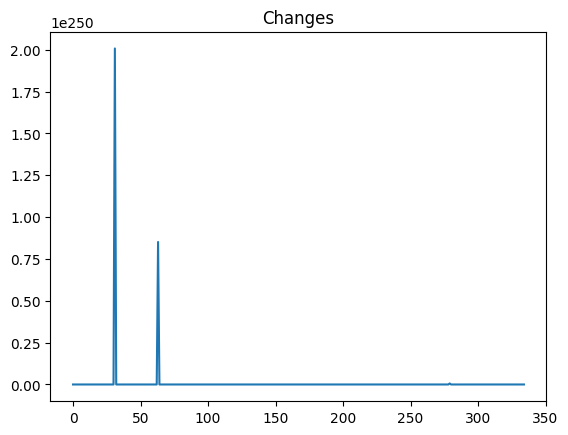

In [8]:
plt.plot(history_book['changes'])
plt.title("Changes")

Text(0.5, 1.0, 'Values')

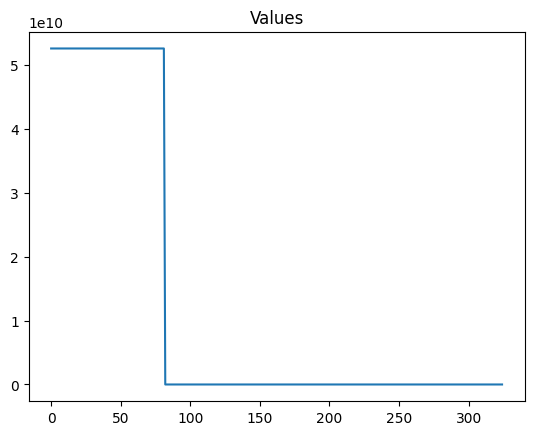

In [9]:
plt.plot(history_book['values'][10:])
plt.title("Values")

Text(0.5, 1.0, 'Temperature')

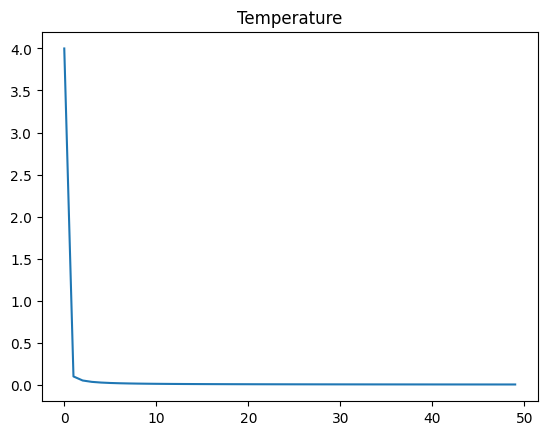

In [10]:
plt.plot(history_book['temperature'][:50])
plt.title("Temperature")